# **NETFLIX STOCK PRICE PREDICTION**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
from datetime import date

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

**Importing Dataset**

In [2]:
data = pd.read_csv("NFLX.csv")
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


**Data Preprocessing**

In [3]:
data.shape

(1009, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [6]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no null values in the dataset.

In [7]:
data.duplicated().sum()

0

There is no duplicate values in the dataset.

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
print("Starting Date: ", data.iloc[0][0])
print("Starting Date: ", data.iloc[-1][0])
print("Starting Date: ", data.iloc[-1][0]-data.iloc[0][0])

Starting Date:  2018-02-05 00:00:00
Starting Date:  2022-02-04 00:00:00
Starting Date:  1460 days 00:00:00


**Data Visualization**

In [10]:
monthwise_price = data.groupby(data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
print(monthwise_price)

                 Open       Close
Date                             
April      402.571191  402.764880
August     417.242157  418.226703
December   433.621668  433.316666
February   391.587178  392.562565
January    417.425679  416.347902
July       439.405232  439.735000
June       422.624591  422.703059
March      388.095978  387.755173
May        402.188808  402.403333
November   437.729513  437.154147
October    438.188538  437.306401
September  436.613210  436.326172


Text(0.5, 1.0, 'Monthly Stock Opening Vs Closing Price')

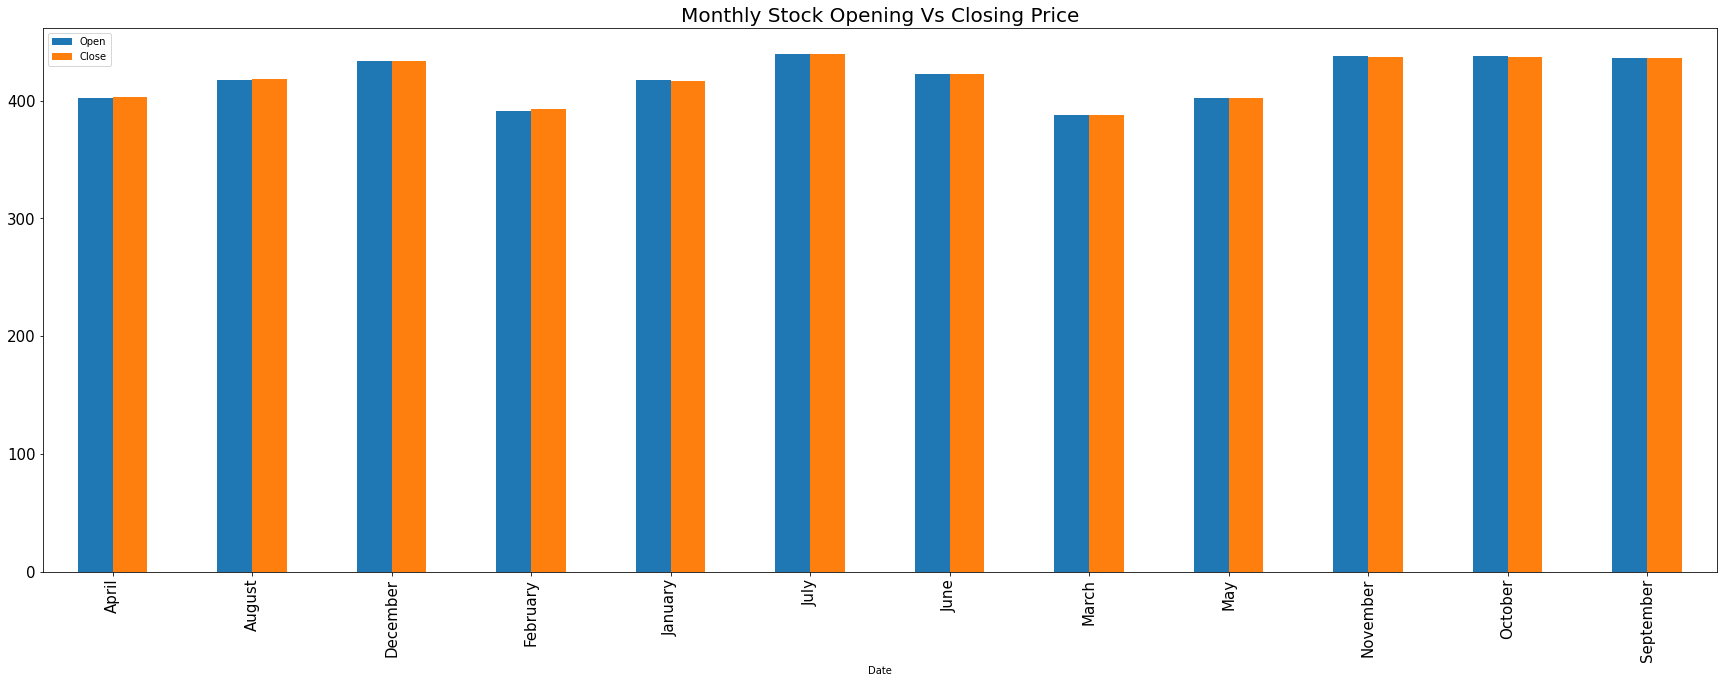

In [11]:
monthwise_price.plot.bar(figsize = (30,10), fontsize = 15)
plt.title('Monthly Stock Opening Vs Closing Price', fontsize = 20)

In [12]:
monthwise_price['Max'] = data.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthwise_price['Min'] = data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()

In [13]:
monthwise_price

,Open,Close,Max,Min
Date,,,,
April,402.571191,402.764880,563.559998,271.220001
August,417.242157,418.226703,569.479980,287.200012
December,433.621668,433.316666,654.520020,231.229996
February,391.587178,392.562565,566.650024,236.110001
January,417.425679,416.347902,609.989990,256.579987
July,439.405232,439.735000,575.369995,305.809998
June,422.624591,422.703059,536.130005,332.649994
March,388.095978,387.755173,556.989990,275.899994
May,402.188808,402.403333,518.950012,305.730011


Text(0.5, 1.0, 'Monthly Max & Min Price')

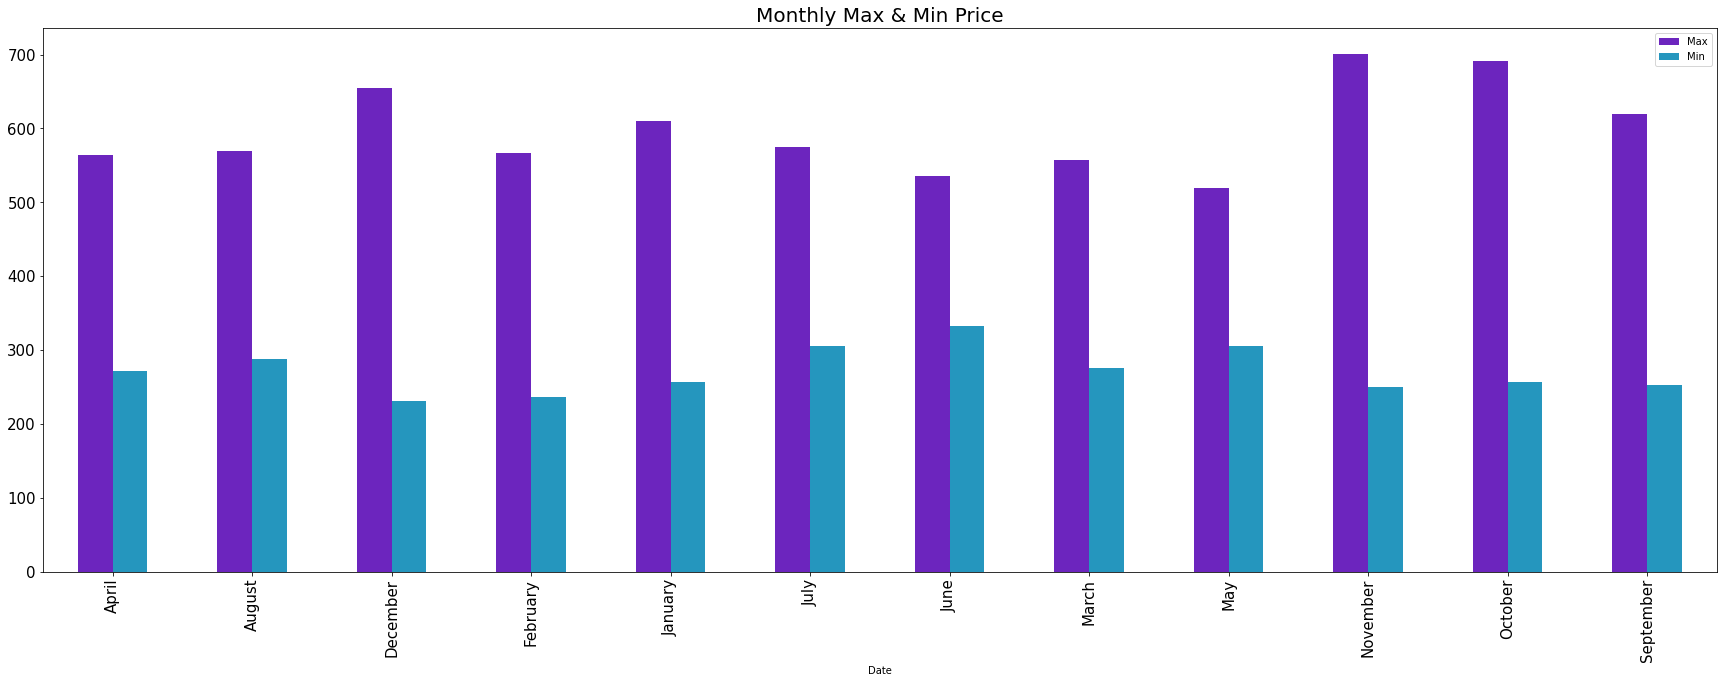

In [14]:
monthwise_price[['Max','Min']].plot.bar(color = {'Max':'#6c25be', 'Min': '#2596be'},figsize=(30,10),fontsize=15)
plt.title('Monthly Max & Min Price', fontsize = 20)

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name='stock_open'))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name='stock_close'))
fig.layout.update(title_text = 'Plot of raw data', xaxis_rangeslider_visible = True)
fig.show()

**Feature Scaling**

MinMaxScaler is a technique used in data preprocessing to scale and transform features or variables of a dataset to a particular range, usually between 0 and 1. This technique helps to normalize the data and make it more consistent, making it easier to compare and analyze the data.

In [16]:
closedf = data.reset_index()['Close']

In [17]:
sc = MinMaxScaler(feature_range=(0,1))
closedf = sc.fit_transform(np.array(closedf).reshape(-1,1))

**Splitting dataset into training and test set**

In [18]:
training_size=int(len(closedf)*0.8)
test_size=len(closedf)-training_size
training_size, test_size

(807, 202)

In [19]:
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:]

In [20]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [22]:
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)
print("X_test: ", X_test.shape)
print("Y_test", Y_test.shape)

X_train:  (706, 100)
Y_train:  (706,)
X_test:  (101, 100)
Y_test (101,)


**Creating Stacked LSTM Model**

In [23]:
#LSTM models require 3-D input
# reshape input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (706, 100, 1)
X_test:  (101, 100, 1)


In [25]:
#Creating a sequential model

model = Sequential()

#Number of hidden units is considered as 50
model.add(LSTM(50, return_sequences = True, input_shape = (time_step,1))) #Shape of the input data that is fed to the LSTM network
model.add(LSTM(50, return_sequences = True)) 
model.add(LSTM(50)) 
model.add(Dense(1)) #A dense layer is a fully-connected layer, i.e. every neurons of the layer N are connected to every neurons of the layer N+1.
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=10, batch_size=10, verbose=1)

Epoch 1/10
71/71 [==============================] - 10s 76ms/step - loss: 0.0123 - val_loss: 0.0160
Epoch 2/10
71/71 [==============================] - 4s 63ms/step - loss: 0.0030 - val_loss: 0.0147
Epoch 3/10
71/71 [==============================] - 5s 64ms/step - loss: 0.0028 - val_loss: 0.0157
Epoch 4/10
71/71 [==============================] - 5s 64ms/step - loss: 0.0029 - val_loss: 0.0109
Epoch 5/10
71/71 [==============================] - 4s 63ms/step - loss: 0.0024 - val_loss: 0.0101
Epoch 6/10
71/71 [==============================] - 4s 63ms/step - loss: 0.0023 - val_loss: 0.0082
Epoch 7/10
71/71 [==============================] - 4s 61ms/step - loss: 0.0029 - val_loss: 0.0097
Epoch 8/10
71/71 [==============================] - 4s 63ms/step - loss: 0.0022 - val_loss: 0.0066
Epoch 9/10
71/71 [==============================] - 5s 64ms/step - loss: 0.0018 - val_loss: 0.0060
Epoch 10/10
71/71 [==============================] - 5s 65ms/step - loss: 0.0018 - val_loss: 0.0057


In [35]:
#Prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict.shape, test_predict.shape

4/4 [==============================] - 0s 24ms/step


((706, 1), (101, 1))

In [29]:
#Transform back to original form
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)
Y_train = sc.inverse_transform(Y_train.reshape(-1,1))
Y_test = sc.inverse_transform(Y_test.reshape(-1,1))

**Evaluation Metrics**

In [30]:
#Mean Absolute Error
print("MAE of training dataset is: ", mean_absolute_error(Y_train, train_predict))
print("MAE of test dataset is: ", mean_absolute_error(Y_test, test_predict))

MAE of training dataset is:  13.720827517622388
MAE of test dataset is:  24.598811738203896


In [31]:
#Mean Squared Error
print("MSE of training dataset is: ", mean_squared_error(Y_train, train_predict))
print("MSE of test dataset is: ", mean_squared_error(Y_test, test_predict))

MSE of training dataset is:  324.51708886011505
MSE of test dataset is:  1189.1562129593972


In [32]:
#Root Mean Squared Error
print("RMSE of training dataset is: ", math.sqrt(mean_absolute_error(Y_train, train_predict)))
print("RMSE of test dataset is: ", math.sqrt(mean_absolute_error(Y_test, test_predict)))

RMSE of training dataset is:  3.7041635381854277
RMSE of test dataset is:  4.9597189172577005


In [33]:
#r2 score
print("r2 score of training data: ", r2_score(Y_train,train_predict))
print("r2 score of test data: ", r2_score(Y_test, test_predict))

r2 score of training data:  0.957209992057956
r2 score of test data:  0.8044083514037923


**Comparison between Actual Close Price vs Predicted Close Price**

Text(0.5, 1.0, 'Comparision between Original Close Price vs Predicted Close Price')

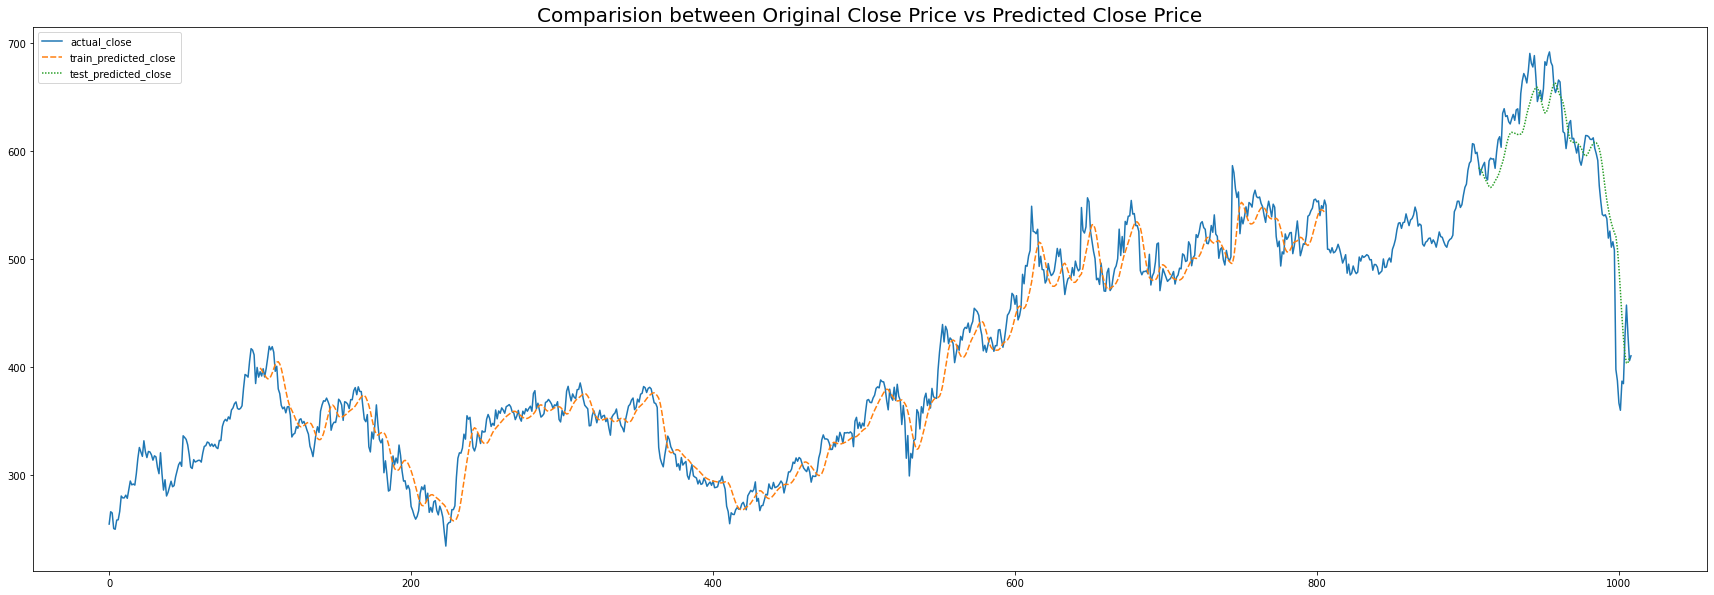

In [34]:
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict

testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_step*2)+1:len(closedf)-1, :] = test_predict

plotdf = pd.DataFrame({'Date': data['Date'],'actual_close': data['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
plt.figure(figsize=(30,10))
sns.lineplot(data=plotdf)
plt.title("Comparision between Original Close Price vs Predicted Close Price",fontsize=20)